In [4]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus']=False    #设置显示中文后,负号显示受影响。解决坐标轴上乱码问题
plt.rcParams['font.family'] = ['Arial Unicode MS'] #mac解决中文显示问题

In [3]:
 # 首先导入数据
df = pd.read_csv(r"./lagoushujuyuanma.csv",encoding='gbk')
df.head()

,公司名称,公司简称,城市,公司规模,学历要求,工作经验,薪资,融资阶段,工作性质,职位诱惑,职位名称,公司福利
0,互道信息技术（上海）有限公司,NextTao 互道信息,上海,50-150人,本科,3-5年,13k-20k,B轮,全职,"技术前沿,大数据平台",NaN,"""节日礼物"",""技能培训"",""年底双薪"",""年度旅游"""
1,小叶子（北京）科技有限公司,小叶子The ONE,北京,500-2000人,本科,在校/应届,3k-4k,D轮及以上,全职,"公司免费午晚餐,交通补助",人事主管,"""优秀团队"",""技术大牛多"",""五险一金"",""弹性工作"""
2,千寻位置网络有限公司,千寻位置,上海,500-2000人,本科,在校/应届,15k-30k,A轮,全职,阿里+中兵合资 餐补 补充商保 成长空间大,NaN,"""节日礼物"",""股票期权"",""带薪年假"",""绩效奖金"""
3,上海脉策数据科技有限公司,脉策科技,上海,150-500人,本科,1-3年,10k-18k,B轮,全职,"弹性工作,薪酬福利好,技术驱动,大牛互助",行政人事,"""股票期权"",""定期体检"",""弹性工作"",""扁平管理"""
4,杭州图尔兹信息技术有限公司,图尔兹,杭州,15-50人,本科,在校/应届,13k-26k,天使轮,全职,大佬带队，工程师文化团队，广阔发展前景,HR,"""股票期权"",""绩效奖金"",""年终分红"""


In [19]:
# 查看数据的形状和各列信息
df.shape
df.info()

(1638, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 12 columns):
公司名称    1638 non-null object
公司简称    1638 non-null object
城市      1638 non-null object
公司规模    1638 non-null object
学历要求    1638 non-null object
工作经验    1638 non-null object
薪资      1638 non-null object
融资阶段    1638 non-null object
工作性质    1638 non-null object
职位诱惑    1638 non-null object
职位名称    1557 non-null object
公司福利    1347 non-null object
dtypes: object(12)
memory usage: 153.6+ KB


In [20]:
# 提取出职位名称缺失的行. 并删除该行
df[df.职位名称.isnull()]

,公司名称,公司简称,城市,公司规模,学历要求,工作经验,薪资,融资阶段,工作性质,职位诱惑,职位名称,公司福利
0,互道信息技术（上海）有限公司,NextTao 互道信息,上海,50-150人,本科,3-5年,13k-20k,B轮,全职,"技术前沿,大数据平台",NaN,"""节日礼物"",""技能培训"",""年底双薪"",""年度旅游"""
2,千寻位置网络有限公司,千寻位置,上海,500-2000人,本科,在校/应届,15k-30k,A轮,全职,阿里+中兵合资 餐补 补充商保 成长空间大,NaN,"""节日礼物"",""股票期权"",""带薪年假"",""绩效奖金"""
5,中科弘云科技（北京）有限公司,中科弘云,北京,15-50人,本科,3-5年,15k-20k,A轮,全职,股权激励，13薪,NaN,"""股票期权"",""绩效奖金"",""年度旅游"",""五险一金"""
60,蜂助手股份有限公司,蜂助手,广州,150-500人,本科,1-3年,8k-12k,D轮及以上,全职,"薪资福利齐,氛围活跃好,团队健全",NaN,"""节日礼物"",""年底双薪"",""技能培训"",""绩效奖金"""
61,普华永道信息技术（上海）有限公司,PwC,上海,500-2000人,本科,3-5年,12k-24k,未融资,全职,外企平台 技术前沿 灵活办公 交通便捷,NaN,"""年底双薪"",""交通补助"",""绩效奖金"",""午餐补助"""
97,深圳市明源云科技有限公司,明源云,深圳,2000人以上,本科,5-10年,30k-50k,上市公司,全职,扁平管理 五险一金 上市公司 公司规模大,NaN,"""高额六险一金"",""年底双薪"",""绩效奖金"",""N项经费"""
101,广州萌啦信息科技有限公司,萌啦信息,广州,50-150人,大专,3-5年,8k-13k,未融资,全职,高新诚聘,NaN,"""五险一金"",""加班补助"",""全勤奖"",""餐补"""
191,爱笔（北京）智能科技有限公司,Aibee,北京,500-2000人,不限,不限,20k-40k,A轮,全职,人工智能 上升空间 弹性工作制 薪酬激励计划,NaN,"""国际化团队"",""计算机视觉"",""语音识别"",""自然语言理解"""
220,阿基米米科技（北京）有限公司,阿基米米,北京,50-150人,本科,1-3年,15k-20k,A轮,全职,五险一金、带薪年假、大牛带队,NaN,"""股票期权"",""扁平管理"",""岗位晋升"",""领导好"""
222,北京字节跳动网络技术有限公司,字节跳动,北京,2000人以上,本科,1-3年,25k-50k,D轮及以上,全职,"下午茶,健身瑜伽,六险一金,股票期权",NaN,"""扁平管理"",""弹性工作"",""就近租房补贴"",""六险一金"""


### axis 指 轴，0是行，1是列，
 
### how 是删除条件：any 任意一个为na则删除整行/列,all 整行/列为na才删除
 
### inplace 是否在原DataFrame 上进行删除，false为否

In [21]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [22]:
#删除缺失值后查看源数据
df.shape
df.info()

(1282, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 1 to 1637
Data columns (total 12 columns):
公司名称    1282 non-null object
公司简称    1282 non-null object
城市      1282 non-null object
公司规模    1282 non-null object
学历要求    1282 non-null object
工作经验    1282 non-null object
薪资      1282 non-null object
融资阶段    1282 non-null object
工作性质    1282 non-null object
职位诱惑    1282 non-null object
职位名称    1282 non-null object
公司福利    1282 non-null object
dtypes: object(12)
memory usage: 130.2+ KB


In [53]:
#重置索引
df.reset_index(drop=True, inplace=True)
df

,公司名称,公司简称,城市,公司规模,学历要求,工作经验,薪资,融资阶段,工作性质,职位诱惑,职位名称,公司福利,平均薪资
0,小叶子（北京）科技有限公司,小叶子The ONE,北京,500-2000人,本科,在校/应届,3k-4k,D轮及以上,全职,"公司免费午晚餐,交通补助",人事主管,"""优秀团队"",""技术大牛多"",""五险一金"",""弹性工作""",3500.0
1,上海脉策数据科技有限公司,脉策科技,上海,150-500人,本科,1-3年,10k-18k,B轮,全职,"弹性工作,薪酬福利好,技术驱动,大牛互助",行政人事,"""股票期权"",""定期体检"",""弹性工作"",""扁平管理""",14000.0
2,杭州图尔兹信息技术有限公司,图尔兹,杭州,15-50人,本科,在校/应届,13k-26k,天使轮,全职,大佬带队，工程师文化团队，广阔发展前景,HR,"""股票期权"",""绩效奖金"",""年终分红""",19500.0
3,上海众言网络科技有限公司,问卷网@众言科技,苏州,150-500人,本科,3-5年,10k-20k,C轮,全职,发展前景好、团队有干劲、福利待遇优,首席招聘官,"""技能培训"",""节日礼物"",""年底双薪"",""绩效奖金""",15000.0
4,深圳市有鱼智能科技有限公司,有鱼智能科技,北京,150-500人,本科,在校/应届,10k-20k,上市公司,全职,BAT班底，极客文化，环境极佳、零食水果,HRM,"""节日礼物"",""股票期权"",""带薪年假"",""绩效奖金""",15000.0
5,深圳澳谷智能科技有限公司,深圳澳谷智能科技有限公司,深圳,15-50人,本科,3-5年,18k-30k,A轮,全职,机器人行业，国际化企业，优秀团队，周末双休,HR,"""机器人"",""海归团队"",""股票期权"",""10天年假""",24000.0
6,中国科学院信息工程研究所,中科院信工所,北京,500-2000人,本科,在校/应届,8k-9k,不需要融资,全职,优秀团队，工作稳定，免费体检，年终奖金,HR,"""免费班车"",""带薪年假"",""绩效奖金"",""岗位晋升""",8500.0
7,中国科学院信息工程研究所,中科院信工所,北京,500-2000人,本科,在校/应届,8k-9k,不需要融资,全职,优秀团队，工作稳定，免费体检，年终奖金,高级招聘专员,"""免费班车"",""带薪年假"",""绩效奖金"",""岗位晋升""",8500.0
8,北京博派通达科技有限公司,博派通达,北京,150-500人,大专,3-5年,15k-30k,C轮,全职,"周末双休,带薪年假,五险一金,节日福利",python开发工程师,"""年底双薪"",""股票期权"",""带薪年假"",""扁平管理""",22500.0
9,北京东方国信科技股份有限公司,东方国信,北京,2000人以上,本科,在校/应届,3k-5k,上市公司,全职,上市公司 近万人规模 周末双休 餐饮补助,Python工程师,"""大数据软件"",""技能培训"",""节日礼物"",""年底双薪""",4000.0


In [52]:
# 算薪资的时候 这一行数据出错，所以删除
df.drop(index=1161, inplace=True)

In [30]:
a = df.城市.value_counts()
a

北京    393
深圳    282
上海    267
广州     95
杭州     88
成都     47
武汉     34
西安     14
南京     14
苏州     10
重庆      7
郑州      6
城市      5
合肥      4
东莞      3
福州      2
天津      2
长沙      2
贵阳      2
厦门      1
宁波      1
威海      1
珠海      1
Name: 城市, dtype: int64

In [55]:
s = []
x = []
for i in range(0,1274,1):
    s = df.薪资[i]
    a = s.replace('K', 'k').replace('k', '').split('-')
    x = (int(a[0])+int(a[-1]))/2*1000
#     print(x)
    print(i)
    df.loc[i,"平均薪资"] = x

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [60]:
df.head()

,公司名称,公司简称,城市,公司规模,学历要求,工作经验,薪资,融资阶段,工作性质,职位诱惑,职位名称,公司福利,平均薪资
0,小叶子（北京）科技有限公司,小叶子The ONE,北京,500-2000人,本科,在校/应届,3k-4k,D轮及以上,全职,"公司免费午晚餐,交通补助",人事主管,"""优秀团队"",""技术大牛多"",""五险一金"",""弹性工作""",3500.0
1,上海脉策数据科技有限公司,脉策科技,上海,150-500人,本科,1-3年,10k-18k,B轮,全职,"弹性工作,薪酬福利好,技术驱动,大牛互助",行政人事,"""股票期权"",""定期体检"",""弹性工作"",""扁平管理""",14000.0
2,杭州图尔兹信息技术有限公司,图尔兹,杭州,15-50人,本科,在校/应届,13k-26k,天使轮,全职,大佬带队，工程师文化团队，广阔发展前景,HR,"""股票期权"",""绩效奖金"",""年终分红""",19500.0
3,上海众言网络科技有限公司,问卷网@众言科技,苏州,150-500人,本科,3-5年,10k-20k,C轮,全职,发展前景好、团队有干劲、福利待遇优,首席招聘官,"""技能培训"",""节日礼物"",""年底双薪"",""绩效奖金""",15000.0
4,深圳市有鱼智能科技有限公司,有鱼智能科技,北京,150-500人,本科,在校/应届,10k-20k,上市公司,全职,BAT班底，极客文化，环境极佳、零食水果,HRM,"""节日礼物"",""股票期权"",""带薪年假"",""绩效奖金""",15000.0


In [62]:
gp = df.groupby('城市')
gp
a = gp['平均薪资'].agg(['mean', 'std'])
a

,mean,std
城市,,
上海,21362.781955,7654.137256
东莞,13333.333333,1443.375673
北京,25166.666667,8955.222130
南京,15964.285714,5655.032768
厦门,15000.000000,NaN
合肥,11500.000000,2886.751346
天津,6000.000000,0.000000
威海,25000.000000,NaN
宁波,12500.000000,NaN


### 根据图可以看出有的职位只在一个城市中，这里我们删除单个城市

In [83]:
condition = df['城市'].str.startswith("福州")
condition

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
1243    False
1244    False
1245    False
1246    False
1247    False
1248    False
1249    False
1250    False
1251    False
1252    False
1253    False
1254    False
1255    False
1256    False
1257    False
1258    False
1259    False
1260    False
1261    False
1262    False
1263    False
1264    False
1265    False
1266    False
1267    False
1268    False
1269    False
1270    False
1271    False
1273    False
Name: 城市, Length: 1266, dtype: bool

In [84]:
df[condition].head()

,公司名称,公司简称,城市,公司规模,学历要求,工作经验,薪资,融资阶段,工作性质,职位诱惑,职位名称,公司福利,平均薪资
327,兴业数字金融服务（上海）股份有限公司,兴业数金,福州,500-2000人,本科,1-3年,13k-25k,不需要融资,全职,科技金融,高级后端开发工程师（Python/golang）,"""六险一金"",""节日津贴"",""补充医疗"",""带薪年假""",19000.0
794,兴业数字金融服务（上海）股份有限公司,兴业数金,福州,500-2000人,本科,1-3年,13k-25k,不需要融资,全职,科技金融,高级后端开发工程师（Python/golang）,"""六险一金"",""节日津贴"",""补充医疗"",""带薪年假""",19000.0


In [86]:
df.drop(index=794, inplace=True)

### 删除个别城市后 重新分组查看

In [87]:
a = df.城市.value_counts()
a

北京    393
深圳    282
上海    266
广州     95
杭州     88
成都     46
武汉     34
南京     14
西安     14
苏州     10
重庆      7
郑州      6
合肥      4
东莞      3
长沙      2
Name: 城市, dtype: int64

In [88]:
gp = df.groupby('城市')
gp
a = gp['平均薪资'].agg(['mean', 'std'])
a

,mean,std
城市,,
上海,21362.781955,7654.137256
东莞,13333.333333,1443.375673
北京,25166.666667,8955.222130
南京,15964.285714,5655.032768
合肥,11500.000000,2886.751346
广州,17605.263158,6480.697500
成都,13869.565217,3985.299072
杭州,18715.909091,5797.242435
武汉,15514.705882,5139.692972


In [89]:
#持久化存储清洗后的数据
df.to_excel("./clean_lagou.xlsx",index=False)

#查看文字所在路径 解决文字显示乱码问题
import matplotlib
print(matplotlib.matplotlib_fname())

print(matplotlib.get_cachedir())

In [101]:
import matplotlib
print(matplotlib.matplotlib_fname())

D:\Anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [104]:
print(matplotlib.get_cachedir())

C:\Users\22124\.matplotlib


In [112]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif' 
plt.rcParams['axes.unicode_minus'] = False

In [113]:
from matplotlib.font_manager import _rebuild
_rebuild() # reload重新加载

<Figure size 640x480 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5,1,'各城市平均薪资直方图')

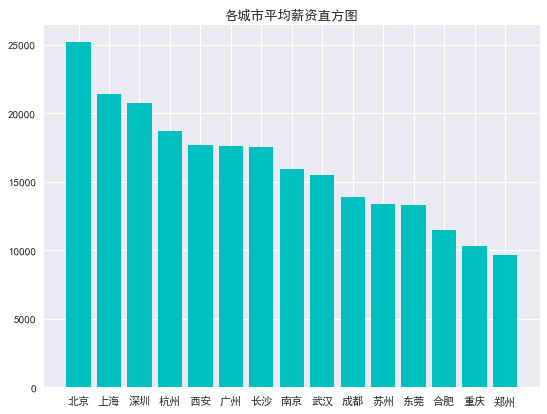

In [114]:
b = a['mean'].sort_values(ascending=False)
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(b.index, b, color='c')
plt.title('各城市平均薪资直方图')

In [115]:
def x(c):
    gp =df.groupby(c)
    a = gp['平均薪资'].agg('mean').sort_values(ascending=False)
    if len(a)<=8:
        b = a
    else:
        b=a[0:8]
    plt.figure(figsize=(8, 6), dpi=80)
    plt.bar(b.index, b, color='c')
    plt.xticks(rotation=30)
    plt.title('各{}平均薪资直方图'.format(c))

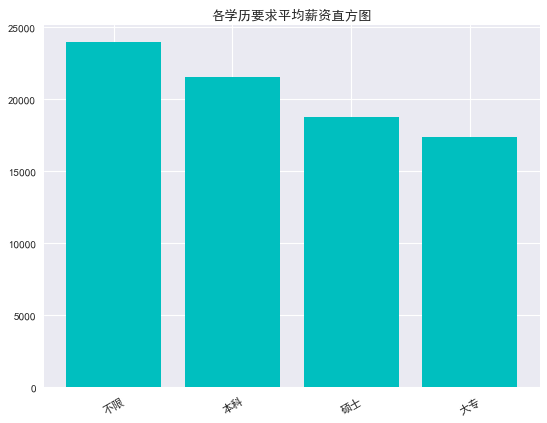

In [116]:
x('学历要求')

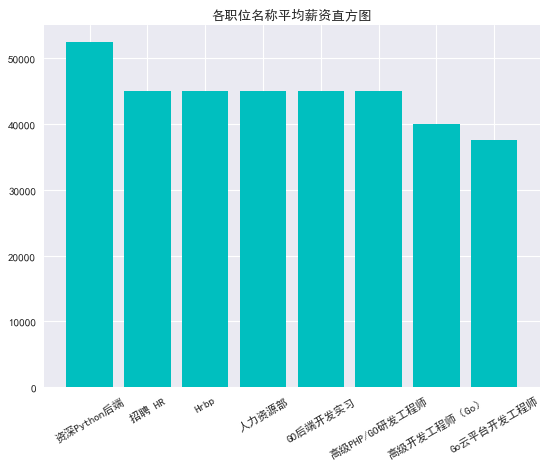

In [117]:
x('职位名称')

In [1]:
s = ''
for i in df.职位名称:
    s = s+' '+i
s
L = ['PHP', 
     'Python', '数据挖掘', '机器学习', '算法', 
     'GO', 
     'Node.js', 
     'Hadoop'
    ]
z = []
for i in L:
    z.append((i, s.count(i)))
print(z)

NameError: name 'df' is not defined

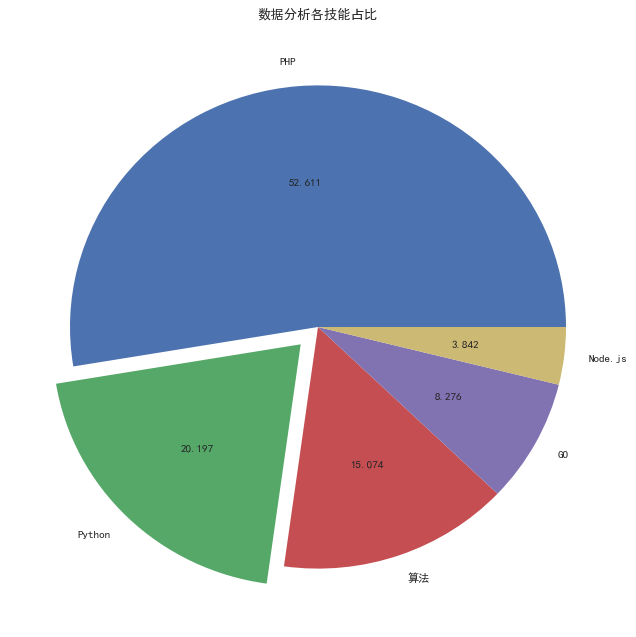

In [138]:
L = [534, 205, 153, 84, 39]
plt.figure(figsize=(10, 10), dpi=80)
plt.pie(L
       ,  labels=['PHP', 'Python',  '算法', 'GO', 'Node.js']
       ,  autopct='%.3f'
       ,  explode=[0, 0.1, 0, 0, 0] 
       );
plt.title('数据分析各技能占比');

In [9]:
a = df.城市.value_counts()
a
b = list(zip(a.index, a.values.tolist()))
b
# 导入地理类
from pyecharts.charts import Geo
# 导入配置项类
from pyecharts import options as opts

# 主题类
from pyecharts.globals import ThemeType
# 设置地图北京 China
geo.add_schema(maptype='china')

# # 添加数据
# geo.add(series_name='各城市数据分析职位地理图',  data_pair=b, type_ = 'effectScatter')

# # 添加全局配置项
#                     #  群居配置项下的标题配置项
# geo.set_global_opts(title_opts= opts.TitleOpts(title = '全国各城市数据分析职位统计图'),
#                     # 全局配置项下的视觉设置配置项
#                     visualmap_opts=opts.VisualMapOpts(min_ = 0 , max_=450),
#                     # 全局配置项下的工具箱配置项
#                     toolbox_opts= opts.ToolboxOpts(is_show=False))

# # 系列配置项
# geo.set_series_opts(label_opts=opts.LabelOpts(False))
# geo.render_notebook()

北京    476
深圳    360
上海    352
广州    135
杭州    101
成都     59
武汉     43
西安     23
南京     22
苏州     15
郑州      8
重庆      7
城市      6
宁波      4
合肥      4
长沙      3
东莞      3
珠海      3
贵阳      2
福州      2
天津      2
桂林      2
大连      1
咸阳      1
厦门      1
中山      1
佛山      1
威海      1
Name: 城市, dtype: int64

[('北京', 476),
 ('深圳', 360),
 ('上海', 352),
 ('广州', 135),
 ('杭州', 101),
 ('成都', 59),
 ('武汉', 43),
 ('西安', 23),
 ('南京', 22),
 ('苏州', 15),
 ('郑州', 8),
 ('重庆', 7),
 ('城市', 6),
 ('宁波', 4),
 ('合肥', 4),
 ('长沙', 3),
 ('东莞', 3),
 ('珠海', 3),
 ('贵阳', 2),
 ('福州', 2),
 ('天津', 2),
 ('桂林', 2),
 ('大连', 1),
 ('咸阳', 1),
 ('厦门', 1),
 ('中山', 1),
 ('佛山', 1),
 ('威海', 1)]

NameError: name 'geo' is not defined